### COVID-19 Quick Start Notebook  
- If this is your first time using the IBM Functional Genomics Platform SDK, please see our [installation documentation](https://ibm.github.io/omxware-pypi-docs/build/html/installation.html) and [Getting Started Notebook](https://github.com/IBM/omxware-getting-started/blob/master/GettingStarted.ipynb) or [Getting Started Documentation](https://ibm.github.io/omxware-pypi-docs/build/html/usage.html). 
- If you have any questions, please feel free to reach out to us via our forums http://ibm.biz/functional-genomics-forum.

**Verify Python 3**

In [1]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


**Install or Update the OMXWare Package (if needed)**

In [2]:
!echo 'y' | pip uninstall omxware

#Install OMXWare client
!pip install --no-cache-dir omxware

# #Install PrettyPrint
# !pip install --no-cache-dir pprint

# #Install py4j to use Dynamic forms
# !pip install --no-cache-dir py4j

# #Install panda
# !pip install --no-cache-dir pandas

Found existing installation: omxware 0.1.45
Uninstalling omxware-0.1.45:
  Would remove:
    /home/vader/Projects/python3_env/lib/python3.7/site-packages/omxware-0.1.45.dist-info/*
    /home/vader/Projects/python3_env/lib/python3.7/site-packages/omxware/*
Proceed (y/n)?   Successfully uninstalled omxware-0.1.45
You should consider upgrading via the '/home/vader/Projects/python3_env/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip show omxware

Name: omxware
Version: 0.1.45
Summary: IBM Functional Genomics Platform SDK to explore data.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: IBM
Location: /home/vader/Projects/python3_env/lib/python3.7/site-packages
Requires: urllib3, python-keycloak, configparser, pycryptodome, pandas, matplotlib, simplejson, requests, IPython
Required-by: 


**Import OMXWare and initialize**

In [4]:
%matplotlib inline

import json
import pprint
import math
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware

# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
token = omxware.get_token('username', 'password') # fill in password to initiate token

# or

# use previously generated token loaded from file
# token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
# f = open(token_path)
# token = f.readline()


# provide your token to authenticate
omx = omxware.omxware(token)


**Access OMXWare Help**

In [5]:
help(omx)

Help on omxware in module omxware.omxware object:

class omxware(builtins.object)
 |  omxware(omxware_token, env='public')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, omxware_token, env='public')
 |      Initialize a session.
 |      
 |      Parameters:
 |          :param omxware_token: OMXWare Token. use
 |          :type omxware_token: str
 |      
 |          :param env: OMXWare `env` type. Must be one of ['master', 'dev', 'dev_search', 'local']
 |          :type env: str
 |  
 |  domains(self, ids=None, sequence=None, genus_names=None, protein_ids=None, go_terms=None, ipr_ids=None, sequence_length=None, classification=None, collection=None, page_size=25, page_number=1)
 |      Get OMXWare Domains.
 |      
 |      Parameters:
 |      
 |          :param ids: List of domain ids
 |          :type ids: [str]
 |      
 |          :param sequence: Domain sequence
 |          :type sequence: str
 |      
 |          :param genus_names: List of Genus names
 |          :type ge

**Search for Details About a Specific Gene Sequence**  
- Since the IBM Functional Genomics Platform has pre-computed millions of genes, proteins, etc. and stored all of the unique sequences, we can access the data with a simple retrieval to see if a sequence already exists. If that sequence exists, you can then just connect out to other related biological entities e.g. query a gene then find the relevant domains for its protein sequences.  
- If you're interested in a fuzzy search, this can be accomplished by retrieving sequences of interest and using your aligner/classifier of choice. Those sequences of interest can be retrieved as a dataframe, JSON, or FASTA format.
- Alternatively, you can complete a fuzzy search using our [BLAST application](http://ibm.biz/functional-genomics-blast)

In [6]:
search_term = "ATGATCGAGATACAACACCTTAACCTGACGTTTGGCGAGGGCGAGAAGCGTAATCAGGTGCTGGACGATGTGAATATCAGCGTGAGGGAGGGGGAGATTTACGGCCTGGTGGGGGAGTCCGGTTCGGGCAAAACCACGGTGCTGAAATGCCTTGCCGGGCTGTTTACCCACTGGGAGGGCGAGCTGGCGATTAACGGCAAGCGGCTGGAAAAACGTATCAGCCAGGAACGCTGCCGCCGGGTGCAGATGGTATTTCAGGATCCGTACGGCTCTTTGCATCCGCGTCACACCATCGGCGATATTCTGGAAGAGCCGCTGCACATTCACCGCATAAAAGATCGGGAGCGGCGCGTTCACGCCCTGCTGGATAAAGTTGGGCTTAATCGGGCGTTTCGCGATCGCTATCCGCACCAGCTTTCCGGCGGGCAGCGCCAGCGCGTGGCGATTGCCAGGGCGCTGATTCTGGAGCCGCAGGTGCTGCTGCTGGATGAACCTACCTCGGCGCTGGACGTCTCGGTGCAGGCGGAAATCCTCAACCTGCTGGCGGAACTTCAGCGTGAGTCGAACCTGACCTACCTGATGGTCACCCACGATCTGGGCGTGATTGCCCATCTGTGTCAGAAGGTGGCGGTAATGCAGTATGGCAAAATCCTTGAAAGCCTGACGGTGGACGAACTGGTCGCCGGGCAGGCCAAAACCGACTATACGCGGATGCTGGTCAATGCCTCACAGCAGTATTCCCGCGAGATGGCGCGGGAGGTGGCGGTGTATTAG"

genes = omx.genes(sequence = search_term,page_size=25)
#search for sequence is an exact string search and is case insensitive

total_results = genes.total_results()
#search will only return one result since we are looking for a specific sequence

print('Total Number of Results: %d' % total_results)

for each_gene in genes.results():
    print('Gene Name(s): {}'.format(each_gene.name()))
    print('Gene UID:',each_gene.id())
    genomes = each_gene.genomes()
    print('Number of Genomes this sequence is found in:',genomes.total_results())

Total Number of Results: 1
Gene Name(s): ['Oligopeptide transport ATP-binding protein OppF']
Gene UID: 000002b370e57ecc5b92dec8cae249cf
Number of Genomes this sequence is found in: 5


**Search for Details About a Specific Gene By Name**
- Here we provide an example of how to search a gene name to a specific classification of data e.g. bacteria, virus, or all as well as layering on a limitation to data only associated with SARS-CoV-2

In [7]:
search_term = 'Spike Glycoprotein'

genes_bacteria = omx.genes(gene_name=search_term, page_size=25,classification='bacteria')
#default classification is 'bacteria'

genes_virus = omx.genes(gene_name=search_term, page_size=25,classification='virus')
genes_all = omx.genes(gene_name=search_term, page_size=25,classification='all')
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=25,collection=['covid19'],classification='virus')
# search is case insensitive and will match partial strings

print('Total Unique Sequences for (Bacteria) %s: %d' % (search_term, genes_bacteria.total_results()))
print('Total Unique Sequences for (Virus) %s: %d' % (search_term, genes_virus.total_results()))
print('Total Unique Sequences for (All) %s: %d' % (search_term, genes_all.total_results()))
print('Total Unique Sequences for (SARS-COV-2) %s: %d' % (search_term, genes_sars_cov2.total_results()))

Total Unique Sequences for (Bacteria) Spike Glycoprotein: 3712
Total Unique Sequences for (Virus) Spike Glycoprotein: 12654
Total Unique Sequences for (All) Spike Glycoprotein: 16366
Total Unique Sequences for (SARS-COV-2) Spike Glycoprotein: 6898


**Getting all Results for a query**

In [8]:
search_term = 'Spike Glycoprotein'
genes_sars_cov2 = omx.genes(gene_name=search_term,page_size=100,collection=['covid19'],classification='virus')
total = genes_sars_cov2.total_results()
print('Total Number of Results should be:',total)
pages = math.ceil(total/100)
print('Total Number of Pages to be queried:',pages)
final_results = []
list_uid = []
for counter in range(1,pages+1):
    results = omx.genes(gene_name=search_term,page_size=100,collection=['covid19'],classification='virus',page_number=counter)
    results = results.results(type='list')
    for item in results:
        final_results.append(item)
        list_uid.append(item.id())
print('Total Final Results:',len(final_results))
print('Total Final Unique Results:',len(set(final_results)))
print('Total Gene UID returned:',len(list_uid))
print('Total Unique Gene UID returned:',len(set(list_uid)))

Total Number of Results should be: 6898
Total Number of Pages to be queried: 69
Total Final Results: 6698
Total Final Unique Results: 6698
Total Gene UID returned: 6698
Total Unique Gene UID returned: 6698


**Get results in a dataframe** *to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb*

In [9]:
genes_virus_df = genes_virus.results(type='df')
genes_virus_df.head()

,id,name,type,genera,genomes,sequence_length,status,go_codes,interproscan_ids,omx_creation_ts,omx_modified_ts,classification,collection
0,6efa65acd677199d20be1e98835ff23b,[Spike glycoprotein],gene,[betacoronavirus],[EPI_ISL_419876],3822,active,"[GO:0016021, GO:0019031, GO:0019064, GO:003965...","[IPR002552, IPR018548, IPR027400, IPR036326]",2020-04-06T14:54:16.000Z,2020-07-30T21:34:53.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
1,72af05fd86a0f8a1773968711c38cb2e,[Spike glycoprotein],gene,[betacoronavirus],[EPI_ISL_475945],3822,active,"[GO:0016021, GO:0019031, GO:0019064, GO:003965...","[IPR002552, IPR018548, IPR027400, IPR036326, I...",2020-07-28T19:11:17.000Z,2020-07-28T19:11:17.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
2,8efa2cc66568eae7d6e1e3a4824970e4,[Spike glycoprotein],gene,[betacoronavirus],[EPI_ISL_486511],3822,active,"[GO:0016021, GO:0019031, GO:0019064, GO:003965...","[IPR002552, IPR018548, IPR027400, IPR036326, I...",2020-07-28T16:18:04.000Z,2020-07-28T16:18:04.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
3,2703e2ed0dd3c122fbe80a36ab4948af,[Spike glycoprotein],gene,[betacoronavirus],[EPI_ISL_512988],3822,active,"[GO:0016021, GO:0019031, GO:0019064, GO:003965...","[IPR002552, IPR018548, IPR027400, IPR032500, I...",2020-08-18T14:12:33.000Z,2020-08-18T14:12:33.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
4,b33e2c68c42bf0f8be8b508550b939db,[Spike glycoprotein],gene,[betacoronavirus],[MT451074.1],3822,active,"[GO:0016021, GO:0019031, GO:0019064, GO:003965...","[IPR002552, IPR018548, IPR027400, IPR036326, I...",2020-06-02T16:49:13.000Z,2020-06-02T21:07:46.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."


**Get distribution of genes across genera**

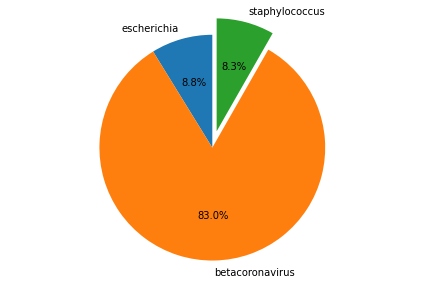

In [10]:
genes_all.show_facets(name = 'genera',topN=3)

**Retrieve Additional Gene Data (e.g. Sequence) from OMXWare as Object**

In [11]:
gene_list = genes_virus.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(genes.type(), genes.total_results()) )
    
gene = gene_list[0]
print("Id  \t\t=> " + gene.id())
print("Name   \t\t=> {}".format(gene.name()))
print("Sequence   \t=> " + gene.sequence()[:100] + "...")
print("Sequence length => " + str(gene.sequence_length()))

print("\n\n JSON:")
print(gene.json())



Returns: List of gene objects 
Results: 1

Id  		=> 6efa65acd677199d20be1e98835ff23b
Name   		=> ['Spike glycoprotein']
Sequence   	=> ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACAC...
Sequence length => 3822


 JSON:
{'id': '6efa65acd677199d20be1e98835ff23b', 'name': ['Spike glycoprotein'], 'type': 'gene', 'genera': ['betacoronavirus'], 'genomes': ['EPI_ISL_419876'], 'sequence_length': 3822, 'status': 'active', 'go_codes': ['GO:0016021', 'GO:0019031', 'GO:0019064', 'GO:0039654', 'GO:0046813', 'GO:0055036', 'GO:0061025', 'GO:0075509'], 'interproscan_ids': ['IPR002552', 'IPR018548', 'IPR027400', 'IPR036326'], 'omx_creation_ts': '2020-04-06T14:54:16.000Z', 'omx_modified_ts': '2020-07-30T21:34:53.000Z', 'classification': ['virus'], 'collection': ['sars cov 2', 'sars-cov-2', 'sars cov2', 'covid-19', 'covid19', 'covid 19', 'coronavirus', 'corona virus']}


**Search for Details About a Specific Protein from SARS-COV-2 genomes**

In [12]:
search_term = 'Replicase polyprotein 1a'
proteins = omx.proteins(protein_name=search_term,page_size=25,classification='virus',collection = ['sars-cov-2'])
#default classification is bacteria, so when searching for sars-cov-2 results, classification must be specified as 'virus' and specify collection as covid19

print('Total Results for %s: %d' % (search_term, proteins.total_results()))

Total Results for Replicase polyprotein 1a: 19005


**Get results in a dataframe** to get results in other formats, see: https://github.com/IBM/omxware-getting-started/blob/master/RetrieveDataFormats.ipynb

In [13]:
proteins_df = proteins.results(type='df')
proteins_df.head()

,id,name,type,genera,genomes,sequence_length,status,domains,go_codes,interproscan_ids,omx_creation_ts,omx_modified_ts,classification,collection
0,1c81adb857270aca06cc8343aa18c3dc,[Replicase polyprotein 1a],protein,[betacoronavirus],"[MT811486.1, EPI_ISL_483479, EPI_ISL_483479, E...",4405,active,"[028ab10bc2de9122272f202f21002779, 1190692a318...","[GO:0003676, GO:0003723, GO:0003727, GO:000396...","[IPR002589, IPR008740, IPR009003, IPR013016, I...",2020-07-30T20:37:28.000Z,2020-08-11T19:00:08.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
1,5e1dd4ef46dd995c8da2fbc70c7a4bd2,[Replicase polyprotein 1a],protein,[betacoronavirus],"[MT350239.1, MT350248.1, MT350249.1, MT791963....",4405,active,"[1190692a318ed72059f48624fa681f1c, 13e8f292b89...","[GO:0003676, GO:0003723, GO:0003727, GO:000396...","[IPR002589, IPR008740, IPR009003, IPR013016, I...",2020-05-11T23:22:06.000Z,2020-08-11T18:10:05.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
2,a050789016c04aba1138a9693b8d52d5,[Replicase polyprotein 1a],protein,[betacoronavirus],[EPI_ISL_437662],3607,active,"[1190692a318ed72059f48624fa681f1c, 13e8f292b89...","[GO:0003676, GO:0003727, GO:0003968, GO:000419...","[IPR002589, IPR008740, IPR009003, IPR013016, I...",2020-05-12T02:23:15.000Z,2020-05-12T02:23:15.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
3,2d8b1a4c0bedf770464c826f431077bc,[Replicase polyprotein 1a],protein,[betacoronavirus],[EPI_ISL_490580],4405,active,"[1190692a318ed72059f48624fa681f1c, 13e8f292b89...","[GO:0003676, GO:0003723, GO:0003727, GO:000396...","[IPR002589, IPR008740, IPR009003, IPR013016, I...",2020-07-30T22:20:29.000Z,2020-07-30T22:20:29.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."
4,4f2ae9a607cb2cdc5548faca065706e2,[Replicase polyprotein 1a],protein,[betacoronavirus],"[EPI_ISL_485165, EPI_ISL_485287]",4405,active,"[1190692a318ed72059f48624fa681f1c, 13e8f292b89...","[GO:0003676, GO:0003723, GO:0003727, GO:000396...","[IPR002589, IPR008740, IPR009003, IPR013016, I...",2020-07-30T22:14:21.000Z,2020-08-03T17:33:45.000Z,[virus],"[sars cov 2, sars-cov-2, sars cov2, covid-19, ..."


**Retrieve Protein Data from OMXWare as Object**

In [14]:
protein_list = proteins.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(proteins.type(), proteins.total_results()) )
    
protein = protein_list[0]
print("Id  \t\t=> " + protein.id())
print("Name   \t\t=> {}".format(protein.name()))
print("Sequence   \t=> " + protein.sequence()[:100] + "...")
print("Sequence length => " + str(protein.sequence_length()))

print("\n\n JSON:")
print(protein.json())

Returns: List of protein objects 
Results: 19005

Id  		=> 1c81adb857270aca06cc8343aa18c3dc
Name   		=> ['Replicase polyprotein 1a']
Sequence   	=> MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRS...
Sequence length => 4405


 JSON:
{'id': '1c81adb857270aca06cc8343aa18c3dc', 'name': ['Replicase polyprotein 1a'], 'type': 'protein', 'genera': ['betacoronavirus'], 'genomes': ['MT811486.1', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479', 'EPI_ISL_483479'], 'sequence_length': 4405, 'status': 'active', 'domains': ['028ab10bc2de9122272f202f21002779', '1190692a318ed

**Get IPR codes for Protein**

In [ ]:
#Note: not all proteins may have ipr codes attached to them
print("UID of protein sequence: ", protein.id())
protein_ipr = protein.ipr()
print("Total IPR codes on protein %s are: %d" % (protein.id(),protein_ipr.total_results()))
protein_ipr_list = protein_ipr.results(type='list')
list_ipr_codes = []
for each_ipr in protein_ipr_list:
    list_ipr_codes.append(each_ipr.id())
print("IPR Codes on Protein:",list_ipr_codes)

**Get Domains for Protein**

In [ ]:
protein_domains = protein.domains()
print("Total Domains on protein %s are: %d" % (protein.id(),protein_domains.total_results()))
protein_domains_list = protein_domains.results(type='list')
list_domains_uid = []
for each_domain in protein_domains_list:
    list_domains_uid.append(each_domain.id())
print("Domains on Protein:",list_domains_uid)